<a href="https://colab.research.google.com/github/Dheerajthummala/simple_linear_reg/blob/main/Assignment(simplelinear(Q1)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [82]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-84-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

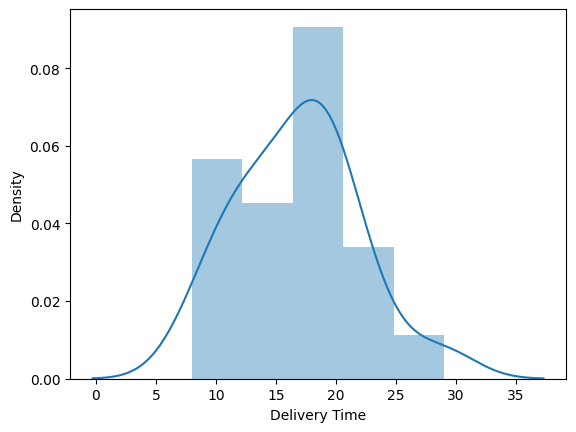

In [84]:
sns.distplot(data['Delivery Time'])

<ipython-input-85-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

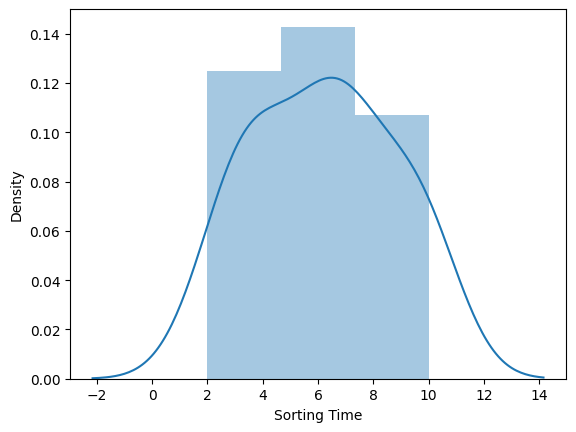

In [85]:
sns.distplot(data['Sorting Time'])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

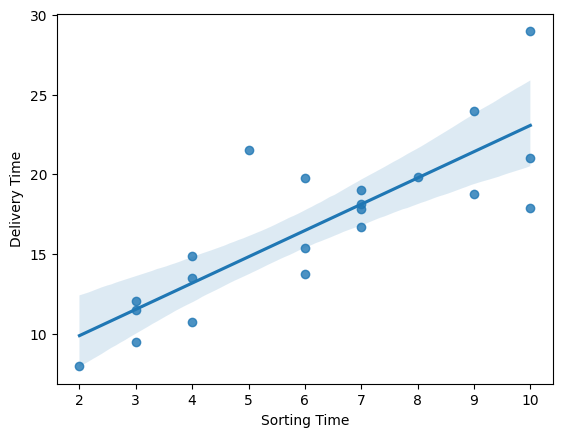

In [86]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])

In [87]:
# it has postive regression
# finding corelation between the x and y
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [88]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [89]:
# it also have positive corelation
# we can build a model
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        06:34:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [92]:
model.rsquared

0.6822714748417231

In [93]:
# as you can see rsquare is very less so its not a good model
# lets create another model
model2=smf.ols("delivery_time~np.sqrt(sorting_time)",data=data).fit()

In [94]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.61e-06
Time:                        06:34:04   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#here rsqaure is less try another model
model3=smf.ols("delivery_time~np.cbrt(sorting_time)",data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.79
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.48e-06
Time:                        06:34:04   Log-Likelihood:                -50.844
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -11.5792      4.332     -2.673      0.015     -20.647      -2.511
np.cbrt(sorting_time)    15.7673      2.383      6.618      0.000      10.780      20.754
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.050
Skew:                           0.896   Prob(JB):                        0.218
Kurtosis:                       3.525   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
model3.params

Intercept               -11.579201
np.cbrt(sorting_time)    15.767284
dtype: float64

model validation

(array([1., 0., 6., 2., 6., 2., 1., 1., 0., 2.]),
 array([-1.76255624, -1.3589621 , -0.95536797, -0.55177383, -0.1481797 ,
         0.25541444,  0.65900857,  1.06260271,  1.46619685,  1.86979098,
         2.27338512]),
 <BarContainer object of 10 artists>)

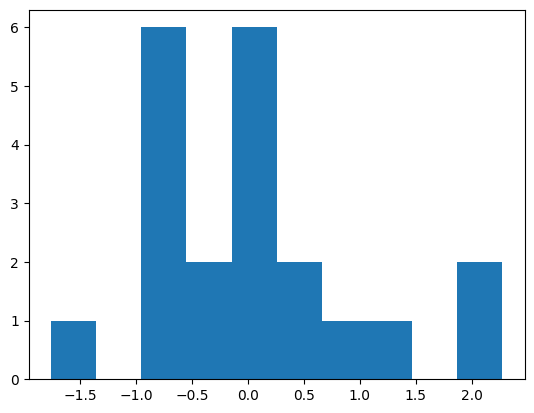

In [97]:
model.resid
plt.hist(model.resid_pearson)

(array([1., 0., 6., 2., 6., 2., 1., 1., 0., 2.]),
 array([-1.76255624, -1.3589621 , -0.95536797, -0.55177383, -0.1481797 ,
         0.25541444,  0.65900857,  1.06260271,  1.46619685,  1.86979098,
         2.27338512]),
 <BarContainer object of 10 artists>)

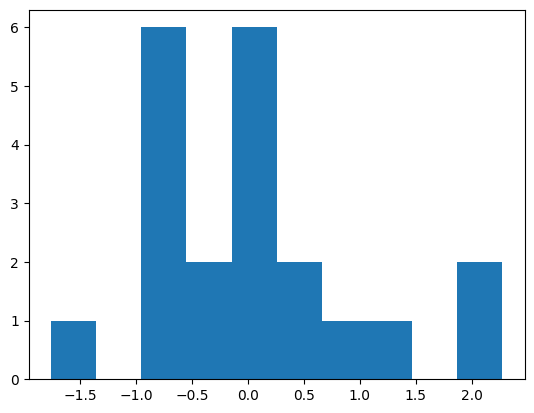

In [98]:
model2.resid
plt.hist(model.resid_pearson)

(array([1., 3., 4., 4., 4., 1., 2., 0., 0., 2.]),
 array([-1.56781957, -1.18026235, -0.79270513, -0.4051479 , -0.01759068,
         0.36996654,  0.75752377,  1.14508099,  1.53263822,  1.92019544,
         2.30775266]),
 <BarContainer object of 10 artists>)

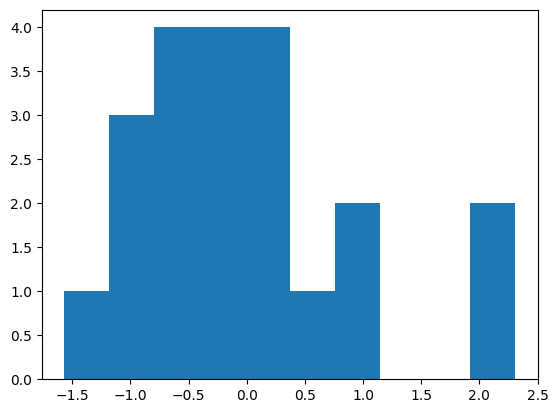

In [99]:
model3.resid
plt.hist(model3.resid_pearson)

prediction

In [100]:
# lets start model prediction
pred=model.predict(data)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [101]:
pred2 = model2.predict(pd.DataFrame(data['sorting_time']))
pred2

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [103]:
pred3 = model3.predict(pd.DataFrame(data['sorting_time']))
pred3

0     22.390381
1     13.449801
2     17.071854
3     21.218070
4     22.390381
5     17.071854
6     18.582527
7     11.161157
8     22.390381
9     21.218070
10    19.955366
11    13.449801
12    18.582527
13    11.161157
14    11.161157
15    13.449801
16    17.071854
17    18.582527
18     8.286331
19    18.582527
20    15.382474
dtype: float64

In [106]:
data['pred_deliverytime']=pred3
data

,delivery_time,sorting_time,pred_deliverytime
0,21.00,10,22.390381
1,13.50,4,13.449801
2,19.75,6,17.071854
3,24.00,9,21.218070
4,29.00,10,22.390381
5,15.35,6,17.071854
6,19.00,7,18.582527
7,9.50,3,11.161157
8,17.90,10,22.390381
9,18.75,9,21.218070


In [ ]:
# as you can see model3 has predicted very well compared to other models